In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving pizza_customers.csv to pizza_customers.csv


In [56]:
data=pd.read_csv('pizza_customers.csv')

## Data Exploration

In [57]:
data.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [58]:
data.columns=['CustomerID','Gender','Age','AnnualIncome','SpendingScore']

In [59]:
data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
bins=[0,20,40,60,np.nan]
names=['<20','20-40','40-60','60+']
data['AgeCategory']=pd.cut(data['Age'],bins,labels=names)

bins=[0,40,60,np.nan]
names=['<40','40-60','60+']
data['SpendingCategory']=pd.cut(data['SpendingScore'],bins,labels=names)


In each spending category the number of females exceed that of males

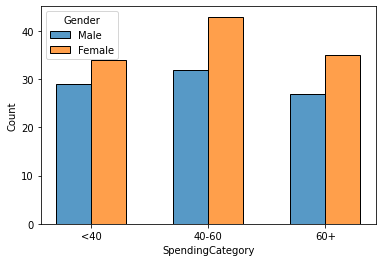

In [61]:
sns.histplot(data=data,x='SpendingCategory',hue='Gender',multiple='dodge',shrink=0.6)

Most of the high spenders are in the age bracket 20-40

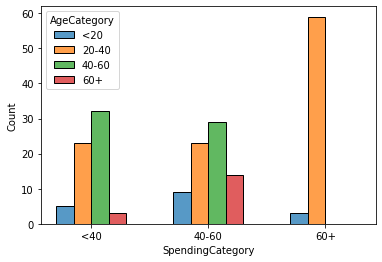

In [62]:
sns.histplot(data=data,x='SpendingCategory',hue='AgeCategory',multiple='dodge',shrink=0.6)

Majority of the customers are medium-earners medium spenders

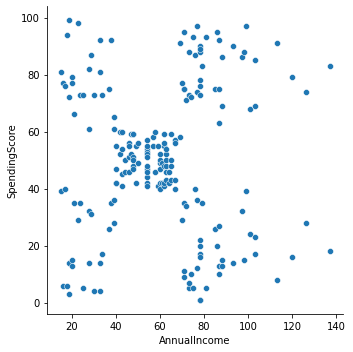

In [63]:
sns.relplot(data=data,x='AnnualIncome', y='SpendingScore')

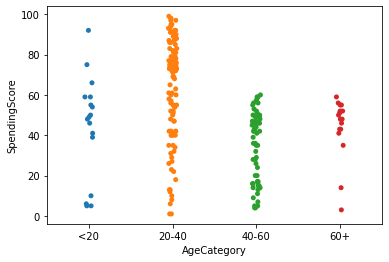

In [64]:
sns.stripplot(data=data,x='AgeCategory',y='SpendingScore',jitter=0.05)

In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Gender']=label_encoder.fit_transform(data['Gender'])

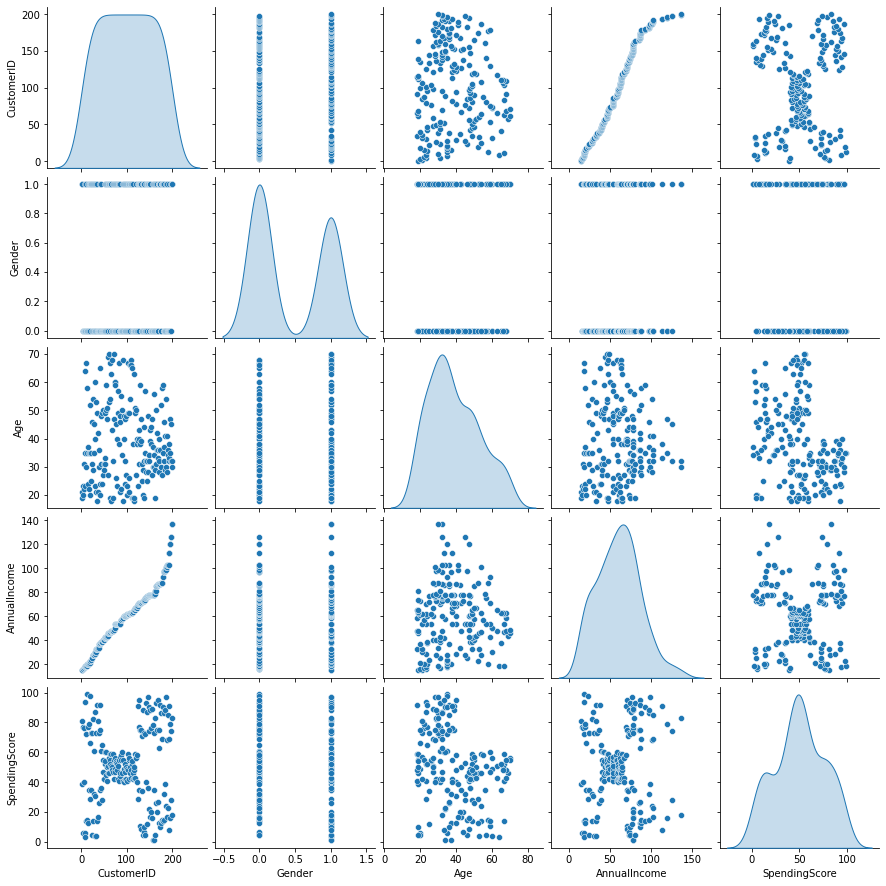

In [66]:
sns.pairplot(data,diag_kind='kde')

In [67]:
data.drop(['CustomerID','AgeCategory','SpendingCategory'],axis=1,inplace=True)

In [68]:
data=data.sample(frac=1)

Utility Functions

In [69]:
def initialize_clusters(points, k):
  """Returns k random points as intial centroids"""
  return points[np.random.randint(points.shape[0], size=k)]

def get_distance_from_points(centroid, points):
  """Returns distance between the centroid and the given points"""
  return np.linalg.norm(points - centroid, axis = 1)

def run_k_means_algorithm(X,k,maxiter=2500):
  centroids = initialize_clusters(X, k)

  # Initialize the vectors in which we will store the
  # assigned classes of each data point and the
  # calculated distances from each centroid
  classes = np.zeros(X.shape[0], dtype=np.float64)
  distances = np.zeros([X.shape[0], k], dtype=np.float64)

  # Loop for the maximum number of iterations
  for i in range(maxiter):
      
      # Assign all points to the nearest centroid
      for i, c in enumerate(centroids):
          distances[:, i] = get_distance_from_points(c, X)
          
      # Determine class membership of each point
      # by picking the closest centroid
      classes = np.argmin(distances, axis=1)
      
      # Update centroid location using the newly
      # assigned data point classes
      for c in range(k):
          centroids[c] = np.mean(X[classes == c], 0)
  return centroids,classes

Elbow Method

In [70]:
# k = 4
maxiter = 100
X=data.to_numpy()
stats=pd.DataFrame(columns=['K','SSE'])
stats.set_index('K',inplace=True)
for k in range(2,15):
  centroids, classes = run_k_means_algorithm(X,k,maxiter)
  SSE=0
  for c in range(k):
    SSE+=(sum(get_distance_from_points(centroids[c],X[classes==c])))
  print(k," ",SSE)
  stats.loc[k]=SSE

2   6041.4368059074695
3   4807.286691919858
4   4182.176304678079
5   3554.096338786426
6   3555.057282182179
7   2989.747803407898
8   2967.32476446942


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


9   2809.5116373205497
10   2608.8799398563788
11   2546.366229532089
12   2413.3668400082897
13   2323.125024369933
14   2385.123102711075


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


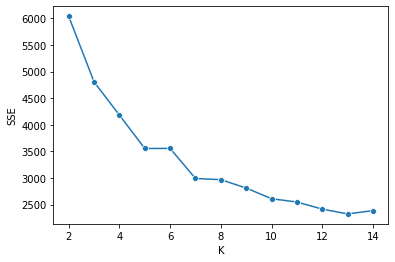

In [71]:
sns.lineplot(stats.index,stats['SSE'],marker='o')

In [81]:
k=5
centroids, classes = run_k_means_algorithm(X,k,5000)

In [82]:
data['classes']=classes
data['classes']=['Cluster'+str(num) for num in classes]

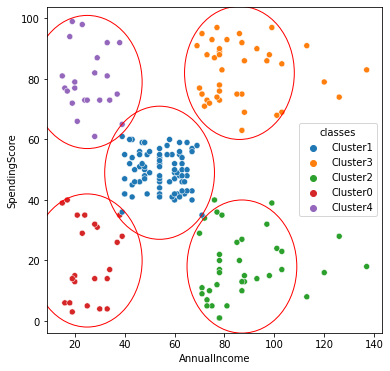

In [83]:
fig, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=data,x='AnnualIncome',y='SpendingScore',hue='classes',ax=ax)
circle = plt.Circle((centroids[:,2][0], centroids[:,3][0]), 22, color='red', fill=False)
ax.add_artist(circle)
circle = plt.Circle((centroids[:,2][1], centroids[:,3][1]), 22, color='red', fill=False)
ax.add_artist(circle)
circle = plt.Circle((centroids[:,2][2], centroids[:,3][2]), 22, color='red', fill=False)
ax.add_artist(circle)
circle = plt.Circle((centroids[:,2][3], centroids[:,3][3]), 22, color='red', fill=False)
ax.add_artist(circle)
circle = plt.Circle((centroids[:,2][4], centroids[:,3][4]), 22, color='red', fill=False)
ax.add_artist(circle)

Cluster Member Count

In [84]:
unique, counts = np.unique(classes, return_counts=True)
dict(zip(unique, counts))

{0: 22, 1: 80, 2: 37, 3: 39, 4: 22}

Print the centroids, to be used in the pipeline

In [85]:
centroids

array([[ 0, 45, 25, 20],
       [ 0, 43, 54, 49],
       [ 0, 40, 87, 18],
       [ 0, 32, 86, 82],
       [ 0, 25, 25, 79]])

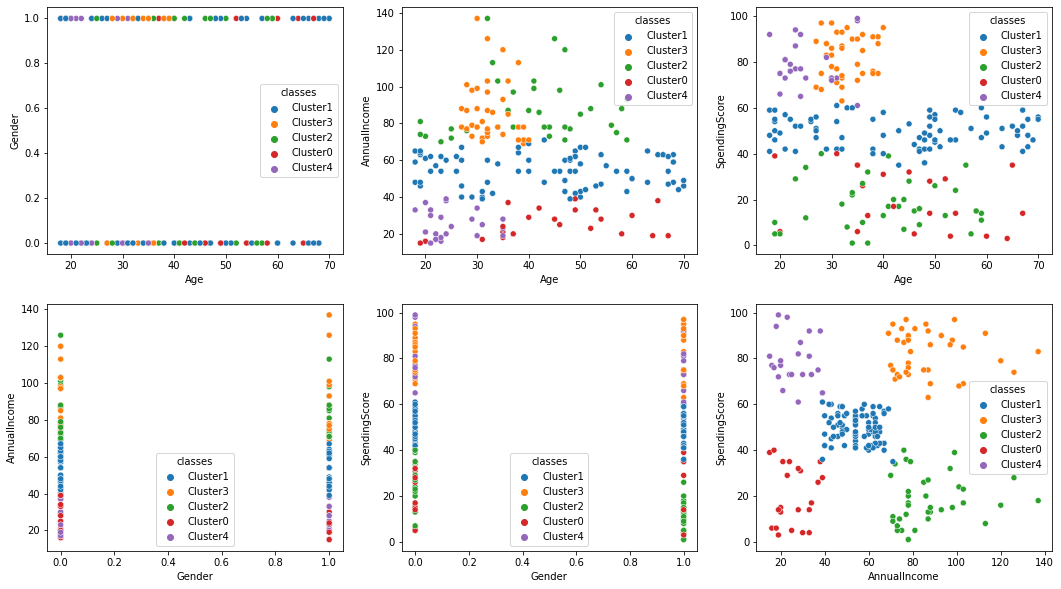

In [86]:
fig, ax = plt.subplots(2,3,figsize=(18,10))
sns.scatterplot(data=data,x='Age',y='Gender',hue='classes',ax=ax[0,0])
sns.scatterplot(data=data,x='Age',y='AnnualIncome',hue='classes',ax=ax[0,1])
sns.scatterplot(data=data,x='Age',y='SpendingScore',hue='classes',ax=ax[0,2])
sns.scatterplot(data=data,x='Gender',y='AnnualIncome',hue='classes',ax=ax[1,0])
sns.scatterplot(data=data,x='Gender',y='SpendingScore',hue='classes',ax=ax[1,1])
sns.scatterplot(data=data,x='AnnualIncome',y='SpendingScore',hue='classes',ax=ax[1,2])


In [87]:
label_encoder.inverse_transform([0,1])

array(['Female', 'Male'], dtype=object)

Cluster Characteristics

In [88]:
for cluster in data['classes'].unique():
  print(cluster)
  display(data.loc[data['classes']==cluster].describe())
  print("________________________________________________________________\n\n")

Cluster1


,Gender,Age,AnnualIncome,SpendingScore
count,80.000000,80.000000,80.000000,80.000000
mean,0.425000,43.187500,54.625000,49.662500
std,0.497462,16.351436,8.703811,6.425707
min,0.000000,18.000000,39.000000,35.000000
25%,0.000000,27.000000,47.750000,44.750000
50%,0.000000,47.000000,54.000000,50.000000
75%,1.000000,54.250000,62.000000,55.000000
max,1.000000,70.000000,71.000000,61.000000


________________________________________________________________


Cluster3


,Gender,Age,AnnualIncome,SpendingScore
count,39.000000,39.000000,39.000000,39.000000
mean,0.461538,32.692308,86.538462,82.128205
std,0.505035,3.728650,16.312485,9.364489
min,0.000000,27.000000,69.000000,63.000000
25%,0.000000,30.000000,75.500000,74.500000
50%,0.000000,32.000000,79.000000,83.000000
75%,1.000000,35.500000,95.000000,90.000000
max,1.000000,40.000000,137.000000,97.000000


________________________________________________________________


Cluster2


,Gender,Age,AnnualIncome,SpendingScore
count,37.000000,37.000000,37.000000,37.000000
mean,0.513514,40.324324,87.432432,18.189189
std,0.506712,11.525465,16.272916,10.715611
min,0.000000,19.000000,70.000000,1.000000
25%,0.000000,34.000000,77.000000,10.000000
50%,1.000000,41.000000,81.000000,16.000000
75%,1.000000,47.000000,97.000000,26.000000
max,1.000000,59.000000,137.000000,40.000000


________________________________________________________________


Cluster0


,Gender,Age,AnnualIncome,SpendingScore
count,22.000000,22.000000,22.000000,22.000000
mean,0.363636,45.090909,25.727273,20.227273
std,0.492366,13.525669,7.566731,12.891237
min,0.000000,19.000000,15.000000,3.000000
25%,0.000000,35.250000,19.250000,7.750000
50%,0.000000,45.500000,24.500000,16.000000
75%,1.000000,53.750000,32.250000,31.750000
max,1.000000,67.000000,39.000000,40.000000


________________________________________________________________


Cluster4


,Gender,Age,AnnualIncome,SpendingScore
count,22.000000,22.000000,22.000000,22.000000
mean,0.409091,25.272727,25.727273,79.363636
std,0.503236,5.257030,7.566731,10.504174
min,0.000000,18.000000,15.000000,61.000000
25%,0.000000,21.250000,19.250000,73.000000
50%,0.000000,23.500000,24.500000,77.000000
75%,1.000000,29.750000,32.250000,85.750000
max,1.000000,35.000000,39.000000,99.000000


________________________________________________________________


